<a href="https://colab.research.google.com/github/ifaindrianningsih/PCVK_Genap-2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FACE DETECTION

Import Drive

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [23]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import PIL
import io
import html
import time
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

<Figure size 1000x1000 with 0 Axes>

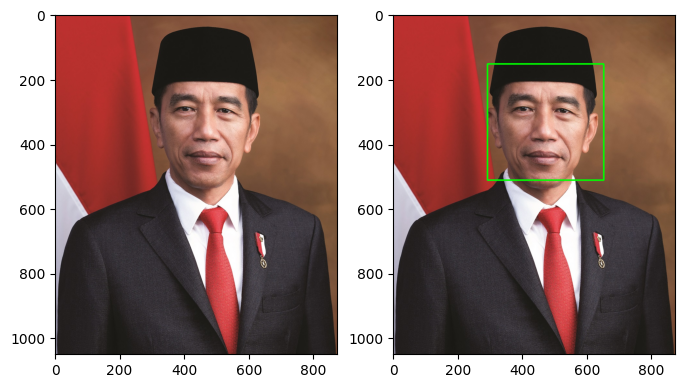

<Figure size 1000x1000 with 0 Axes>

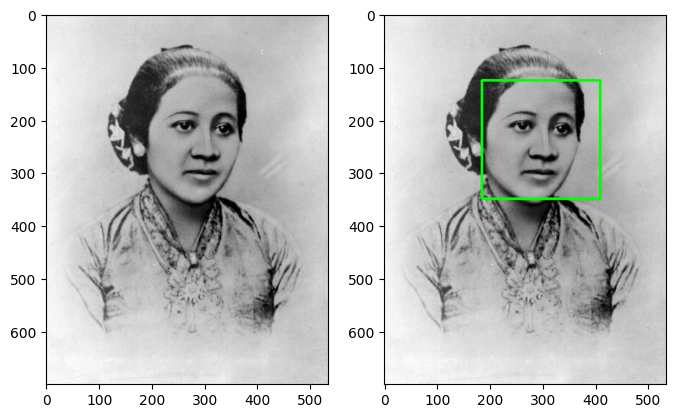

<Figure size 1000x1000 with 0 Axes>

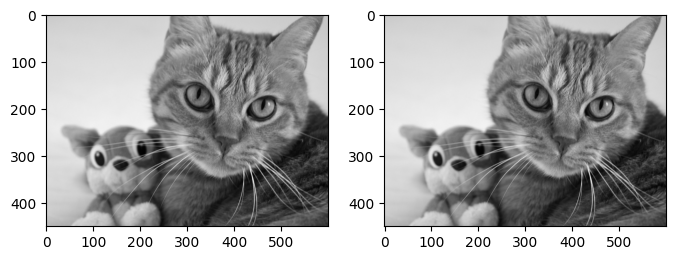

<Figure size 1000x1000 with 0 Axes>

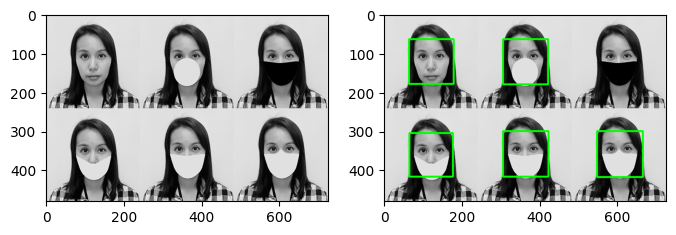

<Figure size 1000x1000 with 0 Axes>

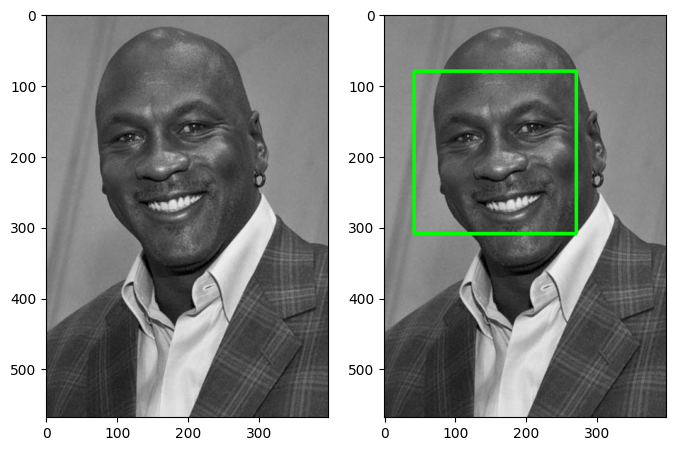

<Figure size 1000x1000 with 0 Axes>

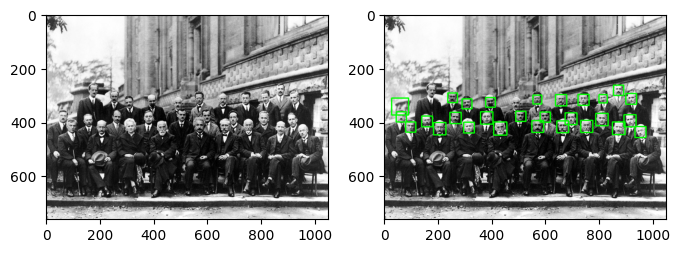

In [11]:
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/jokowi.jpg')
jokowi_rgb = convertToRGB(jokowi)
jokowi_fd = jokowi_rgb.copy()

kartini = cv2.imread('/content/drive/MyDrive/PCVK/kartini.jpg',0)
kartini_rgb = convertToRGB(kartini)
kartini_fd = kartini_rgb.copy()

kucing = cv2.imread('/content/drive/MyDrive/PCVK/kucing2.jpg',0)
kucing_rgb = convertToRGB(kucing)
kucing_fd = kucing_rgb.copy()

mask = cv2.imread('/content/drive/MyDrive/PCVK/mask.png',0)
mask_rgb = convertToRGB(mask)
mask_fd = mask_rgb.copy()

mjordan = cv2.imread('/content/drive/MyDrive/PCVK/mjordan.jpg',0)
mjordan_rgb = convertToRGB(mjordan)
mjordan_fd = mjordan_rgb.copy()

solvayconf = cv2.imread('/content/drive/MyDrive/PCVK/solvayconf.jpg',0)
solvayconf_rgb = convertToRGB(solvayconf)
solvayconf_fd = solvayconf_rgb.copy()

cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascade_frontalface_alt.xml')
def newFaceCascadeFunction(image_rgb, image):
  fd_image = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in fd_image:
    cv2.rectangle(image, (x,y),(x+w,y+h), (0,255,0), 3)
  plt.figure(figsize = (10,10))
  f, axarr = plt. subplots(1,2,figsize=(8,8))
  plt.subplot(121),plt.imshow(image_rgb)
  plt.subplot(122),plt.imshow(image)
  plt.show()

# Gambar Jokowi
newFaceCascadeFunction(jokowi_rgb, jokowi_fd)
# Gambar Kartini
newFaceCascadeFunction(kartini_rgb, kartini_fd)
# Gambar Kucing
newFaceCascadeFunction(kucing_rgb, kucing_fd)
# Gambar Mask
newFaceCascadeFunction(mask_rgb, mask_fd)
# Gambar Mjordan
newFaceCascadeFunction(mjordan_rgb, mjordan_fd)
# Gambar Solvayconf
newFaceCascadeFunction(solvayconf_rgb, solvayconf_fd)

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

<Figure size 1000x1000 with 0 Axes>

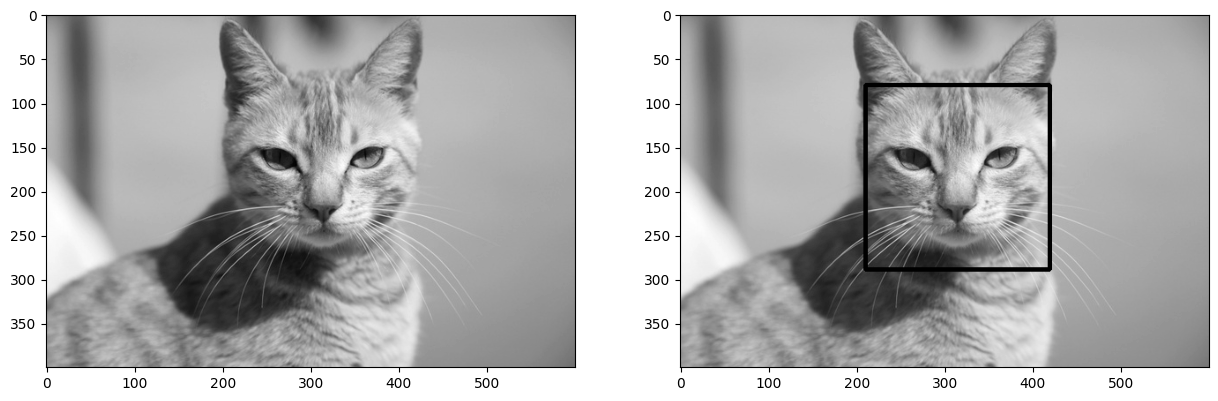

In [13]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

# LOad image
kucing = cv2.imread('/content/drive/MyDrive/PCVK/mycat.jpg', 0)
kucing_ori = cv2.imread('/content/drive/MyDrive/PCVK/mycat.jpg', 0)

roi_wajah = cascade_wajah.detectMultiScale(kucing_ori)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(kucing_ori,(x,y),(x+w,y+h),(0,255,0),3) 
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing_ori, cmap='gray')
plt.show()

Cobakan juga untuk eyes detection pada gambar Jokowi.jpg, sehingga menghasilkan
gambar seperti berikut.

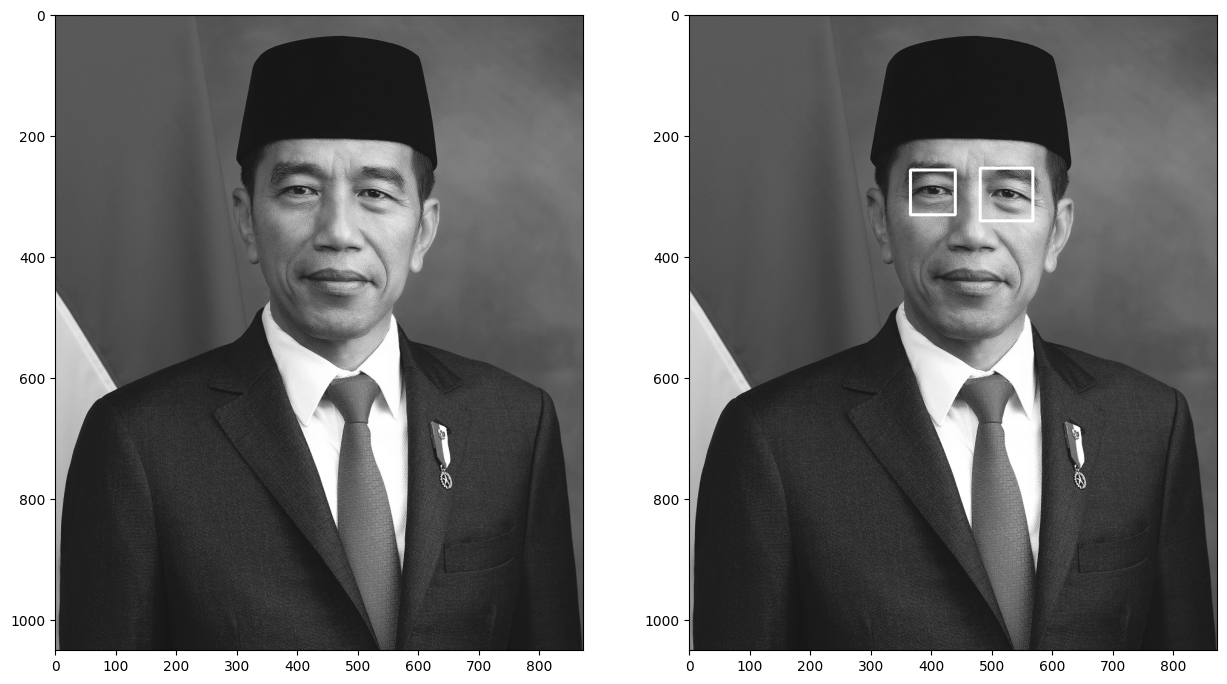

In [14]:
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Load image
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/jokowi.jpg')
jokowi_ori = cv2.imread('/content/drive/MyDrive/PCVK/jokowi.jpg')
jokowi_gray = cv2.cvtColor(jokowi, cv2.COLOR_BGR2GRAY)
jokowi_ori_gray = cv2.cvtColor(jokowi_ori, cv2.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah: 
  cv2.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YiWh7QvVH60

In [15]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


def bbox_to_bytes(bbox_array):
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  bbox_PIL.save(iobuf, format='png')
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64decode(iobuf.getvalue()), 'utf-8')))
  
  return bbox_to_bytes

face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [16]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality){
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  faces = face_cascade.detectMultiScale(gray)
  for(x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)

  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo1.jpg


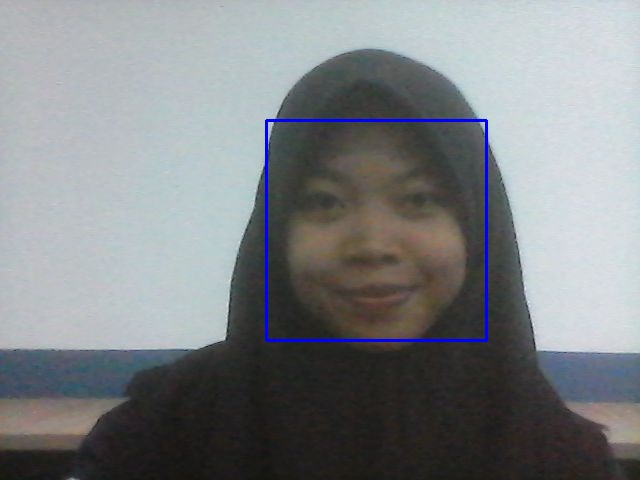

In [17]:
try:
  filename = take_photo('photo1.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

Lakukan deteksi bagian wajah gambar “mjordan.jpg”, kemudian tindih bagian wajah
tersebut dengan gambar “smile.png”. Berikut contoh keluarannya.

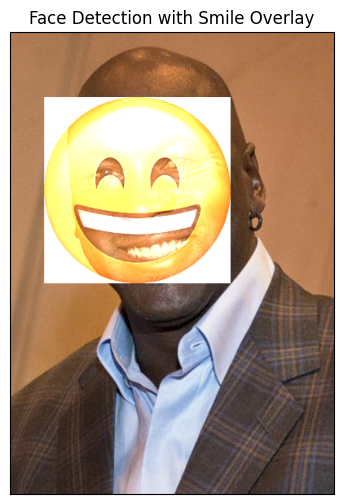

In [33]:
# Load the cascade
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascade_frontalface_alt.xml')

# Load the images
img = cv2.imread('/content/drive/MyDrive/PCVK/mjordan.jpg')
smile = cv2.imread('/content/drive/MyDrive/PCVK/smile.png', cv2.IMREAD_UNCHANGED)

# Convert the images to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = cascade_wajah.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangle around the faces and overlay the smile image
for (x, y, w, h) in faces:
    smile_resized = cv2.resize(smile, (w, h))
    img[y:y+h, x:x+w] = cv2.addWeighted(img[y:y+h, x:x+w], 1, smile_resized[:, :, 0:3], 1, 0)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(122), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Face Detection with Smile Overlay'), plt.xticks([]), plt.yticks([])
plt.show()

Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi
mata menggunakan bounding box berwarna putih, dan deteksi mata kanan
menggunakan bounding box berwarna merah. Gunakan gambar “people.jpg” untuk
mengerjakan soal pada nomor ini. Berikut contoh keluarannya.

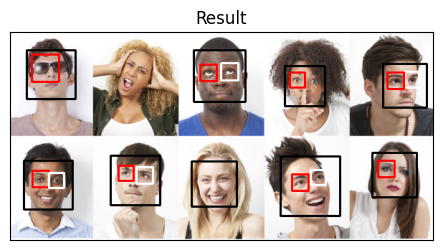

In [40]:
# Load the input image
input_image = cv2.imread('/content/drive/MyDrive/PCVK/people.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes for the faces
for (x, y, w, h) in faces:
    cv2.rectangle(input_image, (x, y), (x+w, y+h), (0, 0, 0), 2)

    # Detect eyes in the face region
    roi_gray = gray_image[y:y+h, x:x+w]
    eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascade_eye.xml')
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5)

    # Draw bounding boxes for the eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 2)

        # Detect the right eye in the face region
        if ex + ew/2 > w/2:
            cv2.rectangle(input_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 2)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(122), plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Result'), plt.xticks([]), plt.yticks([])
plt.show()